<a href="https://colab.research.google.com/github/fahmisyuhada/Kelas-AlPro-2023/blob/main/KLASIFIKASI_DIABETES_DENGAN_ALGORITAM_C_45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [5]:
dataset = pd.read_csv("heart_attack_prediction_dataset.csv", sep=",")

In [6]:
dataset

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [7]:
dataset.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
enc = LabelEncoder()

In [11]:
dataset["Sex"] = enc.fit_transform(dataset['Sex'].values)
dataset["Blood Pressure"] = enc.fit_transform(dataset['Blood Pressure'].values)

In [12]:
dataset.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,1,208,2510,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,2815,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,3224,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,2689,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,3563,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [13]:

dataset["Diet"] = enc.fit_transform(dataset['Diet'].values)
dataset["Country"] = enc.fit_transform(dataset['Country'].values)
dataset["Continent"] = enc.fit_transform(dataset['Continent'].values)
dataset["Hemisphere"] = enc.fit_transform(dataset['Hemisphere'].values)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int64  
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   int64  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

# Visualisasi Data
Here we are going to plot :<br>-
Count Plot :- to see if the dataset is balanced or not <br>
Histograms :- to see if data is normally distributed or skewed <br>
Box Plot :- to analyse the distribution and see the outliers<br>
Scatter plots :- to understand relationship between any two variables<br>
Pair plot :- to create scatter plot between all the variables

# Import library seaboarn

In [15]:
import seaborn as sns #used for data visualization

# Count Plot

<Axes: xlabel='Diabetes', ylabel='count'>

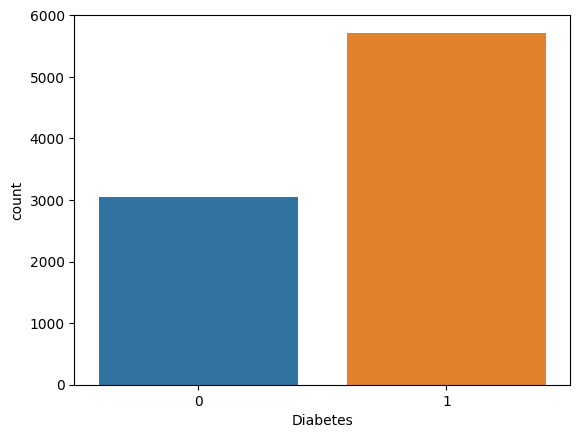

In [16]:
sns.countplot(x='Diabetes', data=dataset)

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

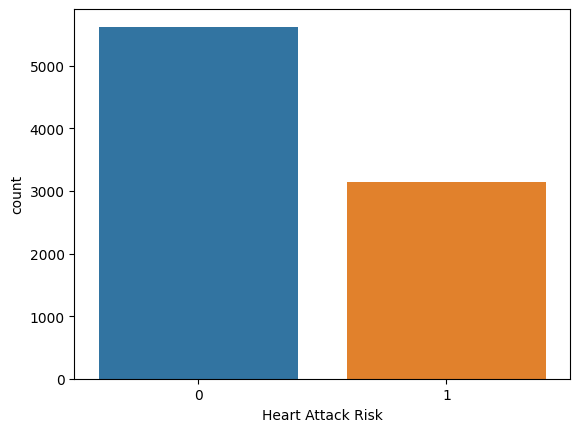

In [17]:
sns.countplot(x='Heart Attack Risk', data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

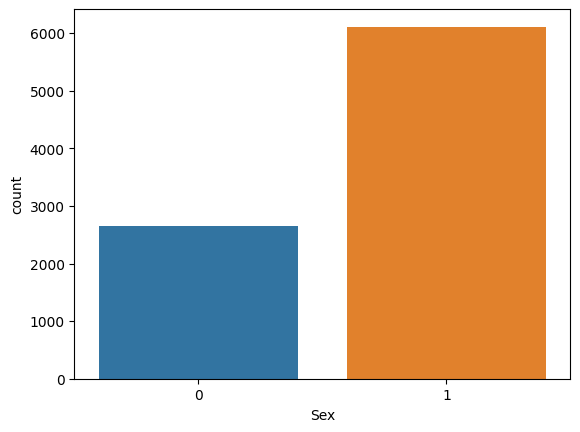

In [18]:
sns.countplot(x='Sex', data=dataset)

# Histogram Plot

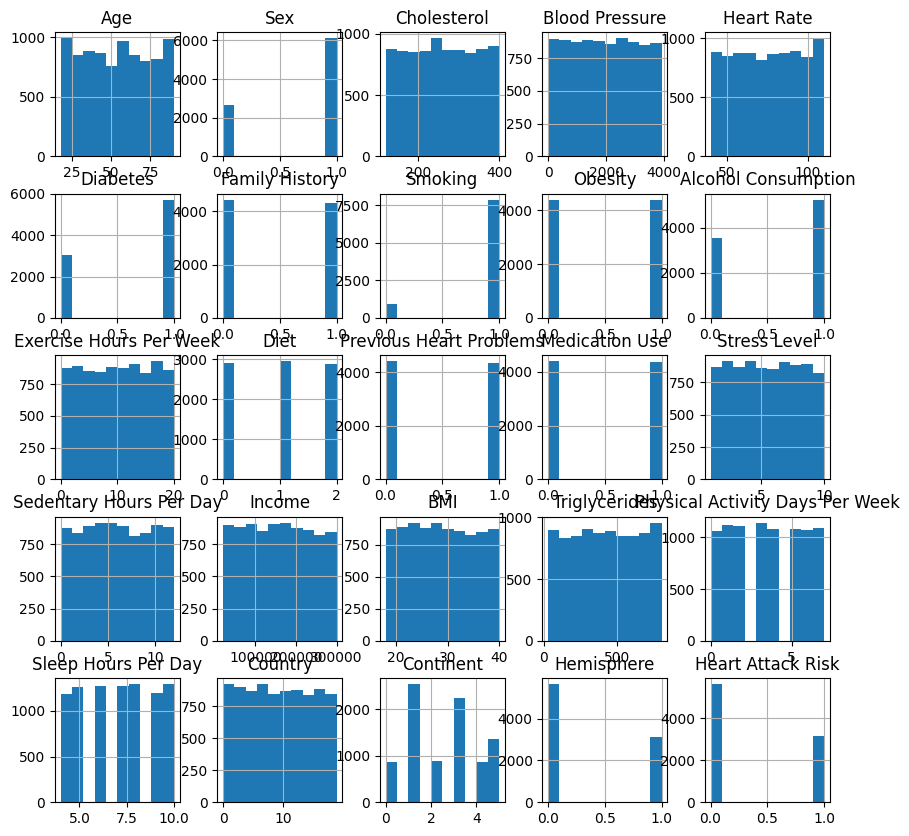

In [19]:
dataset.hist(bins=10,figsize=(10,10))
plt.show()

In [20]:
atr_data = dataset.drop(columns = ['Country', 'Patient ID', 'Continent', 'Hemisphere'])

 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   int64  
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   int64  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  

In [21]:
columns_to_copy = dataset[['Age','Sex','Cholesterol','Blood Pressure', 'Heart Rate', 'Diabetes']]
df2 = columns_to_copy.copy()
df2

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes
0,67,1,208,2510,72,0
1,21,1,389,2815,98,1
2,21,0,324,3224,72,1
3,84,1,383,2689,73,1
4,66,1,318,3563,93,1
...,...,...,...,...,...,...
8758,60,1,121,3680,61,1
8759,28,0,120,2434,73,1
8760,47,1,250,2624,105,0
8761,36,1,178,838,60,1


<Axes: >

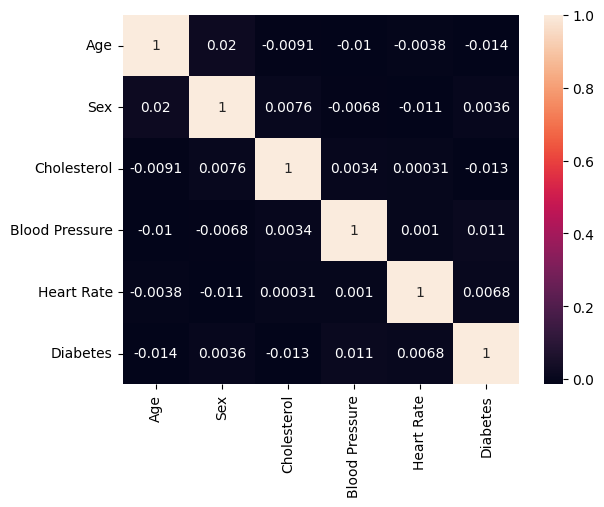

In [22]:
corrmat=df2.corr()
sns.heatmap(corrmat, annot=True)

 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                             8763 non-null   int64  
 13  Previous Heart Problems          8763 non-null   int64  

In [23]:
columns_to_copy = dataset[['Family History','Smoking','Obesity','Alcohol Consumption', 'Exercise Hours Per Week', 'Diabetes']]
df3 = columns_to_copy.copy()
df3

,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diabetes
0,0,1,0,0,4.168189,0
1,1,1,1,1,1.813242,1
2,0,0,0,0,2.078353,1
3,1,1,0,1,9.828130,1
4,1,1,1,0,5.804299,1
...,...,...,...,...,...,...
8758,1,1,0,1,7.917342,1
8759,0,0,1,0,16.558426,1
8760,1,1,1,1,3.148438,0
8761,0,1,0,0,3.789950,1


<Axes: >

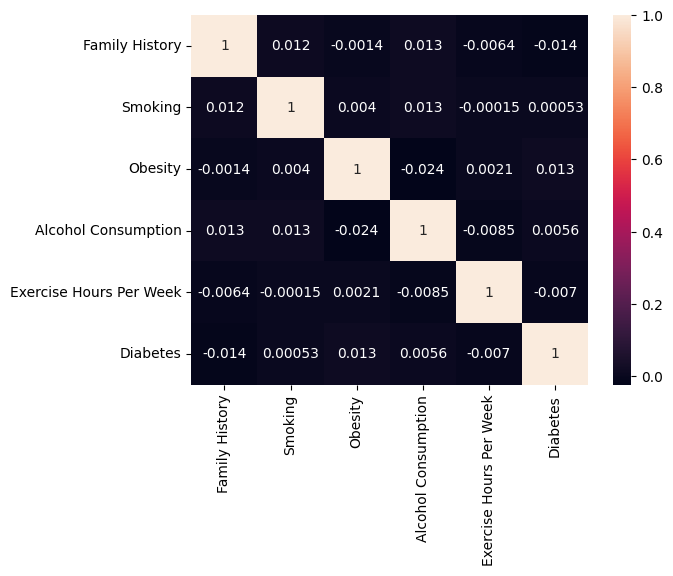

In [24]:
corrmat=df3.corr()
sns.heatmap(corrmat, annot=True)

14  Medication Use                   8763 non-null   int64  
 15  Stress Level                     8763 non-null   int64  
 16  Sedentary Hours Per Day          8763 non-null   float64
 17  Income                           8763 non-null   int64  
 18  BMI                              8763 non-null   float64
 19  Triglycerides                    8763 non-null   int64  
 Triglycerides                    8763 non-null   int64  
 20  Physical Activity Days Per Week  8763 non-null   int64  
 21  Sleep Hours Per Day              8763 non-null   int64  

In [25]:
columns_to_copy = dataset[['Medication Use','Stress Level','Sedentary Hours Per Day','BMI', 'Triglycerides','Sleep Hours Per Day', 'Diabetes']]
df4 = columns_to_copy.copy()
df4

,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Sleep Hours Per Day,Diabetes
0,0,9,6.615001,31.251233,286,6,0
1,0,1,4.963459,27.194973,235,7,1
2,1,9,9.463426,28.176571,587,4,1
3,0,9,7.648981,36.464704,378,4,1
4,0,6,1.514821,21.809144,231,5,1
...,...,...,...,...,...,...,...
8758,1,8,10.806373,19.655895,67,7,1
8759,0,8,3.833038,23.993866,617,9,1
8760,0,5,2.375214,35.406146,527,4,0
8761,1,5,0.029104,27.294020,114,8,1


<Axes: >

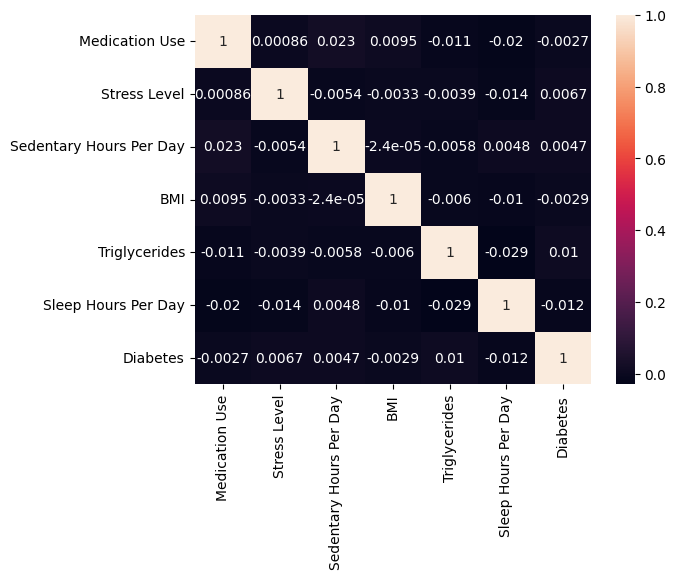

In [26]:
corrmat=df4.corr()
sns.heatmap(corrmat, annot=True)

In [27]:
atr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   int64  
 12  Previous Heart Probl

In [28]:
columns_to_copy = dataset[['Cholesterol','Blood Pressure','Age','Family History', 'Obesity', 'Triglycerides','Sleep Hours Per Day']]
attr_data = columns_to_copy.copy()
attr_data

,Cholesterol,Blood Pressure,Age,Family History,Obesity,Triglycerides,Sleep Hours Per Day
0,208,2510,67,0,0,286,6
1,389,2815,21,1,1,235,7
2,324,3224,21,0,0,587,4
3,383,2689,84,1,0,378,4
4,318,3563,66,1,1,231,5
...,...,...,...,...,...,...,...
8758,121,3680,60,1,0,67,7
8759,120,2434,28,0,1,617,9
8760,250,2624,47,1,1,527,4
8761,178,838,36,0,0,114,8


In [29]:
tar_data = dataset['Diabetes']
tar_data

0       0
1       1
2       1
3       1
4       1
       ..
8758    1
8759    1
8760    0
8761    1
8762    1
Name: Diabetes, Length: 8763, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier




In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(attr_data, tar_data, test_size=0.2, random_state=1)



In [42]:
tree_dataset = DecisionTreeClassifier(random_state=1)

In [43]:
tree_dataset.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=1)

In [44]:
y_predict = tree_dataset.predict(xtest)

cm = confusion_matrix(ytest, y_predict)
print("Confusion Matrix")
print(cm)

akurasi = classification_report(ytest, y_predict)
print("Tingkat akurasi metode C5.5 : ")
print("Akurasi : ", akurasi)
akurasi = accuracy_score(ytest, y_predict)
print("tingkat akurasi : %d persen"%(akurasi*100))

Confusion Matrix
[[208 429]
 [417 699]]
Tingkat akurasi metode C5.5 : 
Akurasi :                precision    recall  f1-score   support

           0       0.33      0.33      0.33       637
           1       0.62      0.63      0.62      1116

    accuracy                           0.52      1753
   macro avg       0.48      0.48      0.48      1753
weighted avg       0.52      0.52      0.52      1753

tingkat akurasi : 51 persen
